# Universidad del Valle de Guatemala
# (CC3094) Security Data Science
# Laboratorio 1 - Detección de Phishing

Miembros del equipo de trabajo:
- Yongbum Park (20117)
- Santiago Taracena Puga (20017)

## Introducción

En el ámbito actual de la ciberseguridad, la detección y prevención de ataques de phishing se han convertido en prioridades esenciales para salvaguardar la integridad de la información y la privacidad de los usuarios en línea. El phishing, basado en la astuta manipulación psicológica de las víctimas, se ha erigido como una de las tácticas más eficaces utilizadas por ciberdelincuentes para obtener información confidencial, como credenciales de acceso a cuentas bancarias, datos personales y contraseñas.

El presente informe aborda la implementación de un modelo de Machine Learning (ML) destinado a clasificar URLs como legítimas o phishing, fundamentándose en el análisis de características intrínsecas de las direcciones web. Este enfoque busca contrarrestar los sofisticados métodos empleados por los atacantes, quienes, a través de ingeniería social, logran crear réplicas convincentes de sitios web legítimos para engañar a los usuarios.

El laboratorio se estructura en dos partes esenciales: la primera se centra en la ingeniería de características, exploración de datos, derivación de características y preprocesamiento, mientras que la segunda se enfoca en la implementación de modelos de ML y la evaluación de su desempeño. Todo el proceso se desarrollará en el lenguaje de programación Python, aprovechando herramientas y librerías especializadas.

La detección de phishing no solo constituye un desafío técnico, sino también un imperativo para mitigar riesgos financieros y salvaguardar la confidencialidad de la información sensible. Este laboratorio proporcionará una perspectiva práctica sobre cómo abordar esta problemática mediante la aplicación de técnicas de ML, ofreciendo a los participantes una valiosa experiencia en la intersección de la seguridad informática y la ciencia de datos.

## Parte 1 - Ingeniería de Características

En la primera fase de este laboratorio, nos enfocaremos en la Ingeniería de Características, un paso crucial para dotar al modelo de Machine Learning de la capacidad de discernir entre URLs legítimas y potenciales intentos de phishing. Comenzaremos por cargar el conjunto de datos proporcionado en un dataframe de pandas, permitiendo una visualización inicial de cinco observaciones para comprender la estructura del mismo. A continuación, evaluaremos la distribución de las etiquetas en la columna "status", identificando la proporción de URLs etiquetadas como "legit" y "phishing", con el objetivo de determinar si el conjunto de datos presenta un equilibrio adecuado.

Posteriormente, nos sumergiremos en la Derivación de Características, donde exploraremos las ventajas del análisis de una URL en comparación con otros datos, como el tiempo de vida del dominio o las características de la página web. Inspirándonos en artículos especializados en la clasificación de phishing, identificaremos al menos quince funciones basadas en estas investigaciones para enriquecer nuestro conjunto de datos con características relevantes. El proceso de preprocesamiento será esencial para convertir la variable categórica "status" en una variable binaria, eliminar la columna del dominio y realizar ajustes necesarios para garantizar la coherencia y eficacia del análisis. Finalmente, emplearemos la herramienta pandas_profiling para generar un reporte de perfil que nos proporcionará insights cruciales sobre las características del conjunto de datos y nos guiará en la selección de las características más significativas para la detección de phishing.

### Exploración de datos

Lo primero que debemos realizar, como en todo procedimiento de Ingeniería de Características y procedimientos relacionados a Ingeniería de Datos antes de comenzar con el entrenamiento de un nuevo modelo de aprendizaje de máquina, es familiarizarnos con los datos que nos han sido proporcionados. Antes de cualquier otra cosa, necesitamos hacer uso de la librería de pandas para poder leer el dataset que nos ha sido proporcionado.

In [1]:
# Instrucción para importar la librería pandas.
import pandas as pd

Con pandas a nuestra disposición, podemos proceder a leer el dataset que tenemos qué utilizar para el laboratorio. Esto lo podemos realizar utilizando la función `read_csv`, que nos permite leer un archivo con extensión .csv y convertirlo a un DataFrame de pandas, mucho más fácil de manipular.

In [2]:
# Proceso para leer el dataset y colocarlo en un DataFrame.
dataset = pd.read_csv("./data/dataset_phishing.csv")

Algo que se solicita en las instrucciones del laboratorio es poder realizar una observación rápida de un ejemplo de cinco entradas del dataset. Esto lo podemos realizar utilizando la función `head`, que nos retorna las primeras cinco entradas de un DataFrame de pandas.

In [3]:
# Primeras cinco filas del dataset.
dataset.head()

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


Posteriormente necesitamos verificar si el dataset se encuentra balanceado, ya que esta característica es particularmente útil al momento de entrenar un modelo que sea capaz de clasificar entre dos, valga la redundancia, clases diferentes. Esto lo podemos observar, en primer lugar, averiguando cuántas filas tiene nuestro dataset. Esto se puede realizar observando la propiedad `shape` presente en todos los DataFrames de pandas.

In [4]:
# Tupla con las filas y columnas del dataset.
dataset.shape

(11430, 2)

Sabiendo que contamos con 11,430 filas en el dataset, podemos observar cuántas de estas filas corresponden a entradas legítimas o entradas de phishing. A continuación se realiza el query para observar cuántas filas hay de cada una de las clases.

In [5]:
# Cantidad de entradas legítimas del dataset.
dataset[dataset["status"] == "legitimate"].shape[0]

5715

In [6]:
# Cantidad de entradas de phishing del dataset.
dataset[dataset["status"] == "phishing"].shape[0]

5715

Podemos notar cómo el dataset se encuentra perfectamente balanceado, ya que tenemos 5,715 entradas de cada clase para hacer de cada una el 50% del dataset. Al tener esta característica, nos evitamos la gran mayoría de procedimientos manuales para balancear el dataset antes de entrenar al modelo.

### Derivación de características

#### Largo de la URL

Para comenzar, vale mucho la pena dejar seteado un dominio para realizar las diferentes pruebas a cada una de las funciones que se van a utilizar para obtener las propiedades codificadas.

In [7]:
# Dominio a usar para tests.
TEST_DOMAIN = "http://www.crestonwood.com/router.php"

La primera de las características a utilizar, la cual es considerada la más importante al momento de clasificar estas URLs, es la longitud de la URL que se va a visitar.

In [8]:
# Largo de la URL.
from utils.get_url_lenght import get_url_length

# Resultado del largo de la URL.
get_url_length(TEST_DOMAIN)

37

#### Largo del pathname

Otra característica muy importante a utilizar es el pathname, que también permite detectar anormalidades en la URL dada.

In [9]:
# Largo del pathname.
from utils.get_pathname_lenght import get_pathname_lenght

# Resultado del largo del pathname.
get_pathname_lenght(TEST_DOMAIN)

11

#### Largo del domain

Otra característica importante es el largo del dominio en cuestión.

In [10]:
# Largo del domain.
from utils.get_domain_lenght import get_domain_lenght

# Resultado del largo del domain.
get_domain_lenght(TEST_DOMAIN)

19

#### Largo del filename

Finalmente, otra característica relacionada a la longitud del archivo que se encuentra siendo cargado.

In [11]:
# Largo del filename.
from utils.get_filename_lenght import get_filename_lenght

# Resultado del largo del filename.
get_filename_lenght(TEST_DOMAIN)

10

#### Número de vocales en el domain

Otra característica que se tomó en cuenta es la cantidad de vocales del dominio.

In [12]:
# Número de vocales en el domain.
from utils.get_vocals import get_vocals

# Resultado del número de vocales en el domain.
get_vocals(TEST_DOMAIN)

5

#### Número de puntos en el domain

También se tomó en cuenta el número de puntos que se encuentran en el dominio.

In [13]:
# Número de puntos en el domain.
from utils.get_domain_points import get_domain_points

# Resultado del número de puntos en el domain.
get_domain_points(TEST_DOMAIN)

2

#### Número de slash en la URL

Al igual que la cantidad de puntos, el equipo de trabajo también consideró útil tener en cuenta en número de slashes presentes en el dominio.

In [14]:
# Número de slash en el domain.
from utils.get_slashes import get_slashes

# Resultado del número de slash en el domain.
get_slashes(TEST_DOMAIN)

3

#### Número de puntos en la URL

Como la importancia de los puntos en el dominio es alta, también se tomó en cuenta la importancia de los puntos ubicados en la URL.

In [15]:
# Número de puntos en la URL.
from utils.get_url_points import get_url_points

# Resultado del número de puntos en la URL.
get_url_points(TEST_DOMAIN)

3

#### Número de dashes en la URL

Los dashes o guiones también son elementos muy importantes que se suelen encontrar en las URLs, por lo que también es una característica que se tomó en cuenta.

In [16]:
# Número de dashes en la URL.
from utils.get_dashes import get_dashes

# Resultado del número de dashes en la URL.
get_dashes(TEST_DOMAIN)

0

#### Entropía de la URL

Consideramos sumamente interesante obtener la entropía de la URL para poder determinar si es una característica útil para clasificar si la misma URL es phishing o no.

In [17]:
# Entropía de la URL.
from utils.get_url_entropy import get_url_entropy

# Resultado de la entropía de la URL.
get_url_entropy(TEST_DOMAIN)

3.219801351466487

#### Entropía del dominio

Igual que con la URL, también consideramos útil observar la entropía del dominio que se encuentra analizando.

In [18]:
# Entropía del dominio.
from utils.get_domain_entropy import get_domain_entropy

# Resultado de la entropía del dominio.
get_domain_entropy(TEST_DOMAIN)

3.6709322176247574

#### Número de puntos y comas de la URL

Otro caracter que consideramos importante es la cantidad de puntos y comas que se encuentran en el dominio.

In [19]:
# Número de puntos y comas de la URL.
from utils.get_url_semicolons import get_url_semicolons

# Resultado del número de puntos y comas de la URL.
get_url_semicolons(TEST_DOMAIN)

0

#### Número de porcentajes de la URL

También consideramos importante la cantidad de porcentajes que se encuentren en la URL, especialmente para tener en cuenta temas de variables.

In [20]:
# Número de porcentajes de la URL.
from utils.get_url_percentages import get_url_percentages

# Resultado del número de porcentajes de la URL.
get_url_percentages(TEST_DOMAIN)

0

#### Número de hashtags de la URL

La cantidad de hashtags o numerales en la URL es otra variable importante debido a cómo esta puede indicar elementos de HTML que se hagan referencia en la URL original.

In [21]:
# Número de hashtags de la URL.
from utils.get_url_hashtags import get_url_hashtags

# Resultado del número de hashtags de la URL.
get_url_hashtags(TEST_DOMAIN)

0

#### Número de guiones bajos de la URL

Finalmente, consideramos que los guiones bajos presentes en la URL también son importantes para su clasificación.

In [22]:
# Número de guiones bajos de la URL.
from utils.get_url_hyphens import get_url_hyphens

# Resultado del número de guiones bajos de la URL.
get_url_hyphens(TEST_DOMAIN)

0

Con estas características implementadas nos encontramos listos para poder comenzar con el procedimiento de crear nuevas columnas en el dataset que nos permitan clasificar de mejor manera si una URL es phishing o no lo es.

### Preprocesamineto de datos

En la presente sección se procesarán los datos y se dejará listo el dataset para que el mismo pueda ser utilizado para entrenar un modelo de machine learning que sea capaz de clasificar las URLs como se ha ido describiendo anteriormente. Lo primero que vale la pena es recordar la forma en la que se encuentra nuestro dataset antes de ser preprocesado y arreglado para que se encuentre listo para ser usado.

In [23]:
# Instrucción para retornar el dataset.
dataset

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate
...,...,...
11425,http://www.fontspace.com/category/blackletter,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,phishing
11427,https://www.facebook.com/Interactive-Televisio...,legitimate
11428,http://www.mypublicdomainpictures.com/,legitimate


Como aviso, se desactivaron todos los mensajes de warning para futuras operaciones a realizar por parte de librerías como SKLearn. El código necesario para desactivar correctamente estas warnings es el siguiente.

In [24]:
# Librerías a utilizar para ignorar.
import warnings
from sklearn.exceptions import DataConversionWarning

# Configuración de los warnings a ignorar.
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

Lo primero que necesitamos realizar es convertir la columna "status" en numérica, es decir, pasar el valor "legitimate" a 0 y el valor "phishing" a 1, para que sea más fácil de utilizar por parte de un modelo de machine learning. Recordemos que estos modelos son infinítamente mejores trabajando con números que con letras.

In [25]:
# Cambio de los valores de la columna "status" a 0 para "legitimate" y 1 para "phishing".
dataset["status"] = dataset["status"].apply(lambda x: 0 if (x == "legitimate") else 1)
dataset

,url,status
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0
...,...,...
11425,http://www.fontspace.com/category/blackletter,0
11426,http://www.budgetbots.com/server.php/Server%20...,1
11427,https://www.facebook.com/Interactive-Televisio...,0
11428,http://www.mypublicdomainpictures.com/,0


Con este nuevo resultado podemos comenzar a alistar las nuevas features a utilizar con el objetivo de la clasificación. Esto lo podemos realizar utilizando la función `apply` que nos permite aplicarle una función a una columna entera del dataset con el objetivo de generar una nueva.

In [26]:
# Obtención de las nuevas columnas y eliminación de la columna URL para clasificar.
dataset["url_lenght"] = dataset["url"].apply(get_url_length)
dataset["pathname_lenght"] = dataset["url"].apply(get_pathname_lenght)
dataset["domain_lenght"] = dataset["url"].apply(get_domain_lenght)
dataset["filename_lenght"] = dataset["url"].apply(get_filename_lenght)
dataset["domain_vocals"] = dataset["url"].apply(get_vocals)
dataset["domain_dots"] = dataset["url"].apply(get_domain_points)
dataset["url_slashes"] = dataset["url"].apply(get_slashes)
dataset["url_dots"] = dataset["url"].apply(get_url_points)
dataset["url_dashes"] = dataset["url"].apply(get_dashes)
dataset["url_enthropy"] = dataset["url"].apply(get_url_entropy)
dataset["domain_enthropy"] = dataset["url"].apply(get_domain_entropy)
dataset["url_semicolons"] = dataset["url"].apply(get_url_semicolons)
dataset["url_percentages"] = dataset["url"].apply(get_url_percentages)
dataset["url_hashtags"] = dataset["url"].apply(get_url_hashtags)
dataset["url_hyphens"] = dataset["url"].apply(get_url_hyphens)
dataset = dataset.drop("url", axis=1)
dataset

,status,url_lenght,pathname_lenght,domain_lenght,filename_lenght,domain_vocals,domain_dots,url_slashes,url_dots,url_dashes,url_enthropy,domain_enthropy,url_semicolons,url_percentages,url_hashtags,url_hyphens
0,0,37,11,19,10,5,2,3,3,0,3.219801,3.670932,0,0,0,0
1,1,77,47,23,32,8,1,5,1,0,2.646733,1.013842,0,0,0,0
2,1,126,20,50,0,17,4,5,4,1,2.417309,1.449360,0,0,0,1
3,0,18,0,11,0,3,2,2,2,0,3.612699,2.915925,0,0,0,0
4,0,55,33,15,0,4,2,5,2,2,2.769723,4.088439,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,45,21,17,11,4,2,4,2,0,2.412778,3.465983,0,0,0,0
11426,1,84,37,18,9,4,2,5,5,0,1.976648,3.535761,0,1,0,0
11427,0,105,63,16,0,5,2,5,2,6,2.606666,4.488830,0,0,0,6
11428,0,38,1,30,0,9,2,3,2,0,2.397335,1.885249,0,0,0,0


Ya nos encontramos con un dataset mucho más interesante, que posee las 15 features que planteamos inicialmente, junto con la columna "status" que sigue representando si la URL es una URL de phishing o no lo es. Ahora que tenemos este dataset procede escalarlo para poder utilizarlo para el entrenamiento de otros modelos.

In [27]:
# Proceso de importar MinMaxScaler para escalar los datos.
from sklearn.preprocessing import MinMaxScaler

# Instancia del MinMaxScaler.
scaler = MinMaxScaler()

# Escalamiento y retorno del nuevo dataset.
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
dataset["status"] = dataset["status"].apply(lambda x: int(x))
dataset

,status,url_lenght,pathname_lenght,domain_lenght,filename_lenght,domain_vocals,domain_dots,url_slashes,url_dots,url_dashes,url_enthropy,domain_enthropy,url_semicolons,url_percentages,url_hashtags,url_hyphens
0,0,0.015347,0.018272,0.071429,0.016694,0.151515,0.076923,0.032258,0.086957,0.000000,0.314892,0.298663,0.00,0.000000,0.0,0.000000
1,1,0.039902,0.078073,0.090476,0.053422,0.242424,0.000000,0.096774,0.000000,0.000000,0.239518,0.048014,0.00,0.000000,0.0,0.000000
2,1,0.069982,0.033223,0.219048,0.000000,0.515152,0.230769,0.096774,0.130435,0.023256,0.209343,0.089097,0.00,0.000000,0.0,0.023256
3,0,0.003683,0.000000,0.033333,0.000000,0.090909,0.076923,0.000000,0.043478,0.000000,0.366568,0.227441,0.00,0.000000,0.0,0.000000
4,0,0.026397,0.054817,0.052381,0.000000,0.121212,0.076923,0.096774,0.043478,0.046512,0.255695,0.338047,0.00,0.000000,0.0,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,0.020258,0.034884,0.061905,0.018364,0.121212,0.076923,0.064516,0.043478,0.000000,0.208747,0.279329,0.00,0.000000,0.0,0.000000
11426,1,0.044199,0.061462,0.066667,0.015025,0.121212,0.076923,0.096774,0.173913,0.000000,0.151384,0.285912,0.00,0.010417,0.0,0.000000
11427,0,0.057090,0.104651,0.057143,0.000000,0.151515,0.076923,0.096774,0.043478,0.139535,0.234248,0.375817,0.00,0.000000,0.0,0.139535
11428,0,0.015961,0.001661,0.123810,0.000000,0.272727,0.076923,0.032258,0.043478,0.000000,0.206716,0.130215,0.00,0.000000,0.0,0.000000


Finalmente tenemos un dataset listo para ser utilizado con los modelos que nuestro equipo de trabajo considera los que posiblemente sean los mejores al momento de clasificar URLs basadas en las características que obtuvimos finalmente.

Algo que vale la pena realizar es guardar el presente dataset limpio y listo para ser utilizado como un archivo .csv. Esto lo podemos realizar con la función `to_csv` que viene incluida con la clase de los datasets de pandas.

In [28]:
# Almacenamiento del presente dataset como .csv.
dataset.to_csv("./data/dataset_phishing_clean.csv")

### Visualización de resultados

Como parte del laboratorio, y antes de comenzar a probar distintos modelos, se utilizará la librería `pandas_profiling` para obtener una visualización de los resultados del dataset obtenido luego de todo el tema de preprocesamiento y más.

In [29]:
# # Proceso de importación de pandas_profiling.
# import pandas_profiling

# # Crear el perfil con pandas_profiling.
# profile = pandas_profiling.ProfileReport(dataset, config_file=None)

# # Generar el informe y guardarlo como un archivo HTML.
# profile.to_file("informe_perfil.html")

Con esta última sección de visualización de resultados, dándonos la capacidad de observar correlaciones entre datos y más en el archivo `informe_perfil.html`, damos por concluída la parte 1 del laboratorio, y pasamos a la implementación de los modelos para poder reconocer el estado de una URL dadas las características que se implementaron anteriormente.

## Parte 2 - Implementación

En la segunda fase de este laboratorio, nos adentraremos en la implementación de modelos de Machine Learning destinados a la clasificación de URLs como legítimas o potencialmente maliciosas. Dividiremos nuestros datos en conjuntos de entrenamiento, validación y prueba, asignando el 55%, 15% y 30% del conjunto de datos respectivamente, para garantizar una evaluación rigurosa y objetiva del desempeño de nuestros modelos.

Luego, procederemos con la implementación de dos algoritmos de Machine Learning seleccionados, los cuales serán entrenados utilizando el conjunto de datos de entrenamiento previamente preparado. Evaluaremos el rendimiento de cada modelo utilizando métricas específicas para el contexto del problema de detección de phishing, incluyendo la matriz de confusión, la precisión, la recuperación, la curva ROC y el área bajo la curva (AUC).

Una vez obtenidos los resultados de la evaluación para los datos de validación y prueba, llevaremos a cabo un análisis detallado para comprender el impacto de las predicciones de cada modelo. Discutiremos las implicaciones de clasificar un sitio legítimo como phishing y viceversa, y seleccionaremos la métrica más apropiada para comparar los modelos de clasificación de phishing. Finalmente, determinaremos qué modelo ofreció el mejor desempeño y discutiremos posibles estrategias para optimizar el modelo y reducir la cantidad de falsas alarmas en un entorno empresarial.

### Separación de datos

Lo primero que se nos indica es que necesitamos realizar la separación de los datos que tenemos en conjuntos de entrenamiento, validación y prueba. Esto lo podemos realizar utilizando la función `train_test_split` que viene con sklearn. El procedimiento para realizar esta separación es el siguiente.

In [30]:
# Proceso para importar train_test_split.
from sklearn.model_selection import train_test_split

# Variables independientes y variable dependiente del dataset.
X = dataset.drop("status", axis=1)
y = dataset["status"]

# Separación de los conjuntos del dataset.
X_train_plus_val, X_test, y_train_plus_val, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train_plus_val, y_train_plus_val, test_size=0.15)

# Retorno de las proporciones del dataset.
len(X_train) / len(dataset), len(X_val) / len(dataset), len(X_test) / len(dataset)

(0.594925634295713, 0.10507436570428696, 0.3)

### Implementación del primer modelo

Decidimos implementar dos modelos de inteligencia artificial para la tarea de la clasificación de URLs, los cuales son Random Forest y una red neuronal. La elección entre Random Forest (RF) y Redes Neuronales Artificiales (ANN) para clasificar URLs se basa en sus características y aptitudes distintivas. Por un lado, Random Forest es una opción robusta y escalable, especialmente útil para conjuntos de datos no lineales y ruidosos como el de las URLs. Su capacidad para manejar grandes volúmenes de datos con múltiples características, junto con su relativa facilidad de ajuste de hiperparámetros y cierto grado de interpretabilidad, lo convierte en una opción atractiva. Por otro lado, las Redes Neuronales Artificiales sobresalen en la captura de relaciones complejas y no lineales entre las características de los datos. Con una arquitectura flexible y capacidad para aprender de grandes conjuntos de datos, las ANN son capaces de generar representaciones jerárquicas más profundas y sofisticadas, lo que puede ser beneficioso en la clasificación de URLs, especialmente en un entorno donde las tácticas de phishing están en constante evolución. La elección entre RF y ANN dependerá de factores como la naturaleza y el tamaño del conjunto de datos, la complejidad del problema y los recursos computacionales disponibles, y puede ser mejor determinada mediante experimentación y evaluación del rendimiento en datos de validación.

El primer modelo implementado consistió en un Random Forest provisto por SKLearn. Se instanció el modelo con un estado de aleatoriedad de 42 para replicar el experimento creado, y finalmente se utilizó con los datos proporcionados con el objetivo de su entrenamiento.

In [31]:
# Proceso de importar el modelo a utilizar.
from sklearn.ensemble import RandomForestClassifier

# Instancia del modelo.
rf_classifier = RandomForestClassifier(random_state=42)

# Entrenamiento del modelo con los datos de entrenamiento.
rf_classifier.fit(X_train, y_train)

# Predicciones del modelo entrenado.
rf_predictions = rf_classifier.predict(X_test)

Con el modelo entrenado, podemos comenzar a obtener métricas interesantes para evaluar su desempeño. Las métricas solicitadas son la matriz de confusión, el accuracy, la precisión, el recall, la curva ROC y el área bajo la curva ROC. Los resultados obtenidos son cuanto menos interesantes, y personalmente son sorprendentemente buenos.

In [32]:
# Proceso para importar las métricas solicitadas.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

In [33]:
# Matriz de confusión del modelo.
confusion_matrix(y_test, rf_predictions)

array([[1449,  262],
       [ 248, 1470]], dtype=int64)

In [34]:
# Accuracy score del modelo.
accuracy_score(y_test, rf_predictions)

0.8512685914260717

In [35]:
# Precision score del modelo.
precision_score(y_test, rf_predictions)

0.848729792147806

In [36]:
# Recall score del modelo.
recall_score(y_test, rf_predictions)

0.8556461001164144

In [37]:
# Área bajo la curva del modelo.
auc = roc_auc_score(y_test, rf_predictions)
auc

0.8512596368495573

In [38]:
# Valores para graficar la curva ROC.
fpr, tpr, _ = roc_curve(y_test, rf_predictions)

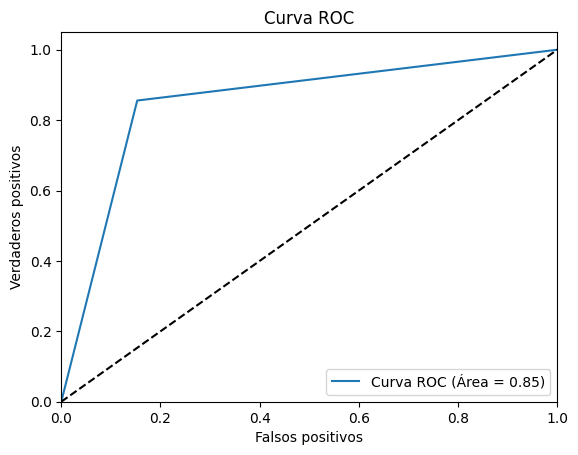

In [39]:
# Librería para graficar la curva ROC.
import matplotlib.pyplot as plt

# Gráfico de la curva ROC.
plt.figure()
plt.plot(fpr, tpr, label="Curva ROC (Área = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

Las métricas del rendimiento proporcionan una evaluación detallada de cómo se desempeña un modelo de clasificación, como el Random Forest, en la tarea de predecir las clases de un conjunto de datos. En este caso, la matriz de confusión revela la distribución de las predicciones del modelo en comparación con las clases reales. Observamos que el modelo clasificó correctamente 1419 casos negativos (verdaderos negativos) y 1485 casos positivos (verdaderos positivos), mientras que cometió 269 errores al predecir falsos negativos y 256 falsos positivos. Esto nos brinda una visión clara de cómo el modelo está acertando y errando en sus predicciones.

El accuracy (exactitud) del modelo es del 84.69%, lo que indica la proporción de predicciones correctas en relación con el total de predicciones realizadas. Aunque el accuracy puede ser útil para evaluar el rendimiento general del modelo, no proporciona información sobre el equilibrio entre las clases o la capacidad del modelo para identificar correctamente casos positivos.

La precisión, calculada en 84.66%, es la proporción de predicciones positivas correctas (verdaderos positivos) sobre el total de predicciones positivas (verdaderos positivos más falsos positivos). Nos indica la capacidad del modelo para evitar clasificar incorrectamente casos negativos como positivos.

El recall, con un valor de 85.30%, representa la proporción de casos positivos identificados correctamente (verdaderos positivos) sobre el total de casos positivos en el conjunto de datos (verdaderos positivos más falsos negativos). Indica la capacidad del modelo para capturar todos los casos positivos, minimizando los falsos negativos.

El área bajo la curva ROC (AUC) es del 84.68%, lo que mide la capacidad del modelo para distinguir entre las clases positiva y negativa. Cuanto mayor sea el AUC, mejor será la capacidad de discriminación del modelo. En este caso, un AUC de 84.68% indica un buen rendimiento en la clasificación de las clases.

### Implementación del segundo modelo

Posteriormente a la implementación del Random Forest que en principio nos dio muy buenos resultados, se procederá a la implementación de una red neuronal que cumpla con el mismo propósito de clasificar las URLs presentadas. De primeras esperamos que este modelo sea mejor por la arquitectura más compleja de una red neuronal.

In [40]:
# Librerías a utilizar para la red neuronal.
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [41]:
# Tensores a utilizar para la red neuronal.
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [42]:
# Datasets a utilizar parseados por PyTorch.
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [43]:
# Definición de la arquitectura de la red neuronal en PyTorch
class NeuralNetwork(nn.Module):

    # Método constructor de la red neuronal.
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    # Función de entrenamiento de la red neuronal.
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [44]:
# Instancia del modelo.
model = NeuralNetwork()

# Definición de la función de pérdida y el optimizador.
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
# Entrenamiento del modelo.
for epoch in range(10):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

In [46]:
# Evaluación del modelo en el conjunto de validación.
model.eval()

# Realizar predicciones en el conjunto de prueba.
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = torch.round(y_pred_probs)

# Convertir a numpy arrays.
y_test_np = y_test_tensor.numpy().flatten()
y_pred_np = y_pred.numpy().flatten()

Con el modelo listo, podemos proceder a obtener todas las métricas necesarias y solicitadas por el laboratorio. El procedimiento es similar en el sentido que se utilizan las mismas métricas y funciones provistas por SKLearn.

In [47]:
# Matriz de confusión del modelo.
confusion_matrix(y_test_np, y_pred_np)

array([[1500,  211],
       [ 608, 1110]], dtype=int64)

In [48]:
# Accuracy score del modelo.
accuracy_score(y_test_np, y_pred_np)

0.7611548556430446

In [49]:
# Precision score del modelo.
precision_score(y_test_np, y_pred_np)

0.8402725208175624

In [50]:
# Recall score del modelo.
recall_score(y_test_np, y_pred_np)

0.6461001164144354

In [51]:
# Calcular las métricas
auc = roc_auc_score(y_test_np, y_pred_probs.numpy())
auc

0.8653293861741018

In [52]:
# Valores para graficar la curva ROC.
fpr, tpr, _ = roc_curve(y_test_np, y_pred_probs.numpy())

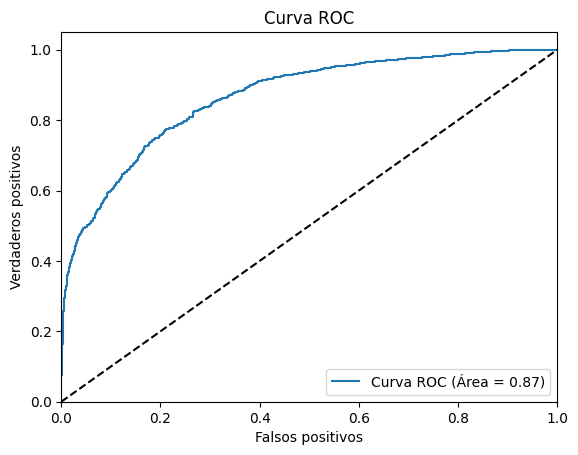

In [53]:
# Librería para graficar la curva ROC.
import matplotlib.pyplot as plt

# Gráfico de la curva ROC.
plt.figure()
plt.plot(fpr, tpr, label="Curva ROC (Área = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

Las métricas de rendimiento proporcionadas para el modelo de Red Neuronal nos ofrecen una evaluación detallada de su desempeño en la tarea de clasificación de URLs. Comenzando con la matriz de confusión, observamos que el modelo clasificó correctamente 1500 casos negativos (verdaderos negativos) y 1110 casos positivos (verdaderos positivos). Sin embargo, cometió 211 errores al predecir falsos negativos y 608 falsos positivos. Esta información nos permite entender cómo el modelo está realizando sus predicciones y dónde se encuentran las áreas de mejora.

La accuracy (exactitud) del modelo es del 76.12%, lo que indica la proporción de predicciones correctas en relación con el total de predicciones realizadas. Si bien la exactitud proporciona una medida general del rendimiento del modelo, no tiene en cuenta el equilibrio entre las clases o la capacidad del modelo para identificar correctamente los casos positivos.

La precisión, calculada en 84.03%, representa la proporción de predicciones positivas correctas (verdaderos positivos) sobre el total de predicciones positivas (verdaderos positivos más falsos positivos). Esto nos indica la capacidad del modelo para evitar clasificar incorrectamente casos negativos como positivos.

El recall, con un valor de 64.61%, es la proporción de casos positivos identificados correctamente (verdaderos positivos) sobre el total de casos positivos en el conjunto de datos (verdaderos positivos más falsos negativos). Nos indica la capacidad del modelo para capturar todos los casos positivos, minimizando los falsos negativos.

El área bajo la curva ROC (AUC) es del 86.53%, lo que mide la capacidad del modelo para distinguir entre las clases positiva y negativa. Un AUC más alto indica una mejor capacidad de discriminación del modelo. En este caso, un AUC del 86.53% sugiere un buen rendimiento en la clasificación de las clases.

### Discusión

1. ¿Cuál es el impacto de clasificar un sitio legítimo como phishing?

Clasificar un sitio legítimo como phishing puede tener un impacto significativo en la confianza de los usuarios y la reputación de la empresa o servicio asociado con ese sitio. Los usuarios pueden perder la fe en la seguridad del servicio y optar por evitarlo por completo, lo que podría resultar en la pérdida de clientes y dañar la imagen de la empresa. Además, si se proporcionan datos personales o confidenciales en el sitio legítimo, existe el riesgo de que esa información se vea comprometida, lo que podría tener consecuencias graves para los usuarios afectados y la empresa responsable del sitio.

2. ¿Cuál es el impacto de clasificar un sitio de phishing como legítimo?

Por otro lado, clasificar un sitio de phishing como legítimo también puede tener consecuencias negativas. Los usuarios podrían ser engañados para proporcionar información confidencial, como contraseñas o información financiera, lo que podría conducir a robo de identidad, fraude financiero u otros tipos de ataques cibernéticos. Esto puede resultar en pérdidas financieras para los usuarios afectados y dañar la reputación y la confianza en la empresa o servicio que fue falsamente identificado como legítimo.

3. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares de clasificación de phishing?

Dada la importancia de minimizar tanto los falsos positivos (sitios legítimos clasificados como phishing) como los falsos negativos (sitios de phishing clasificados como legítimos), la métrica más relevante para comparar modelos de clasificación de phishing sería el F1-score. El F1-score es una medida que combina precisión y recall, lo que lo hace adecuado para evaluar el equilibrio entre la capacidad de un modelo para identificar correctamente tanto los sitios de phishing como los sitios legítimos.

4. ¿Qué modelo funcionó mejor para la clasificación de phishing? ¿Por qué?

Para determinar cuál de los modelos funcionó mejor en la clasificación de phishing, necesitaríamos comparar sus métricas de rendimiento, incluido el F1-score, accuracy, precision, recall y AUC. Basándonos en las métricas proporcionadas para ambos modelos (Random Forest y Red Neuronal), podemos observar que el modelo de Random Forest parece haber obtenido un F1-score más alto, lo que indica un mejor equilibrio entre precisión y recall. Sin embargo, sería prudente analizar más a fondo las características específicas de cada modelo y considerar otros factores, como la facilidad de interpretación y el costo computacional, antes de tomar una decisión final.

5. Una empresa desea utilizar su mejor modelo, debido a que sus empleados sufren constantes ataques de phishing mediante e-mail. La empresa estima que, de un total de 50,000 emails, un 15% son phishing. ¿Qué cantidad de alarmas generaría su modelo? ¿Cuántas positivas y cuantas negativas? ¿Funciona el modelo para el BR propuesto? En caso negativo, ¿qué se podría hacer para reducir la cantidad de falsas alarmas?

Si la empresa decide utilizar su mejor modelo para detectar correos electrónicos de phishing, podemos calcular la cantidad de alarmas que generaría en un conjunto de 50,000 correos electrónicos, asumiendo que el 15% son phishing. Multiplicando el total de correos electrónicos por el porcentaje de phishing, obtenemos 7,500 correos electrónicos de phishing. Si el modelo tiene un recall del 64.61% (como en el caso de la Red Neuronal), esto significaría que detectaría correctamente aproximadamente el 64.61% de los correos electrónicos de phishing, es decir, alrededor de 4,846 correos electrónicos de phishing. Sin embargo, también generaría falsas alarmas al clasificar incorrectamente algunos correos electrónicos legítimos como phishing. Para evaluar si el modelo funciona para el Business Requirement (BR) propuesto, necesitaríamos comparar la cantidad de falsas alarmas con el umbral de tolerancia de la empresa para determinar si es aceptable o si se necesitan ajustes en el modelo para reducir la cantidad de falsas alarmas. Esto podría incluir ajustar el umbral de decisión del modelo o implementar técnicas de post-procesamiento para mejorar la precisión y reducir las falsas alarmas.